In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import sieve

In [3]:
from progress_bar import log_progress
import warnings
warnings.filterwarnings('ignore')

In [4]:
cities = pd.read_csv('cities.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
def is_prime(n):
    """Determines if a positive integer is prime."""

    if n > 2:
        i = 2
        while i ** 2 <= n:
            if n % i:
                i += 1
            else:
                return False
    elif n != 2:
        return False
    return True

In [6]:
cities['is_prime'] = cities.CityId.apply(is_prime)

In [7]:
cities.is_prime.sum()

17802

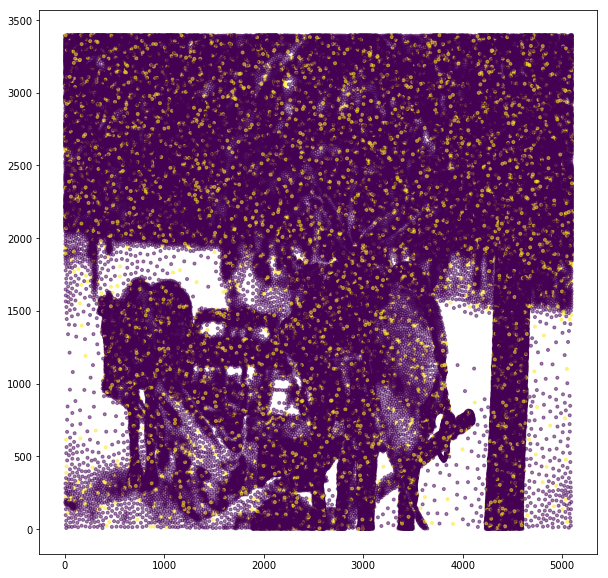

In [8]:
fig = plt.figure(figsize=(10,10))
plt.scatter(cities.X, cities.Y, c=cities['is_prime'], marker=".", alpha=.5);

In [11]:
import math

from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

def euclid_distance(x1, y1, x2, y2):
  # Euclidean distance between points.
    dist = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return dist

In [12]:
def create_distance_matrix(locations):
    size = len(locations)
    dist_matrix = {}
    
    for from_node in range(size):
        dist_matrix[from_node] = {}
        for to_node in range(size):
            x1 = locations[from_node][0]
            y1 = locations[from_node][1]
            x2 = locations[to_node][0]
            y2 = locations[to_node][1]
            dist_matrix[from_node][to_node] = euclid_distance(x1, y1, x2, y2)
    return dist_matrix

In [13]:
def create_distance_callback(dist_matrix):
  # Create the distance callback.

  def distance_callback(from_node, to_node):
    return int(dist_matrix[from_node][to_node])

  return distance_callback

In [14]:
def main():
    locations = create_data_array()
    dist_matrix = create_distance_matrix(locations)
    dist_callback = create_distance_callback(dist_matrix)
    tsp_size = len(locations)
    num_routes = 1
    depot = 0
    node_lst = []
    
    if tsp_size > 0:
        routing = pywrapcp.RoutingModel(tsp_size, num_routes, depot)
        search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()
        routing.SetArcCostEvaluatorOfAllVehicles(dist_callback)
        # Solve the problem.
        assignment = routing.SolveWithParameters(search_parameters)
        if assignment:
            # Solution cost.
            #print("Total distance: " + str(assignment.ObjectiveValue()) + "\n")
            # Inspect solution.
            # Only one route here; otherwise iterate from 0 to routing.vehicles() - 1.
            route_number = 0
            node = routing.Start(route_number)
            start_node = node
            route = ''

            while not routing.IsEnd(node):
                route += str(node) + ' -> '
                node_lst.append(node)
                node = assignment.Value(routing.NextVar(node))
            route += '0'
            #print("Route:\n\n" + route)
        else:
            print('No solution found.')
    else:
        print('Specify an instance greater than 0.')
        
    return(node_lst)
        

#if __name__ == '__main__':
#    main()

In [15]:
def create_data_array():
    locations = []
    for i in cities_subset.CityId:
        locations.append([cities_subset.X[i], cities_subset.Y[i]])
            
    return(locations)

In [16]:
cities['bins'] = pd.cut(cities['CityId'], list(range(0, len(cities), 1000)), 
       labels=list(range(0, len(list(range(0, len(cities), 1000)))-1)), include_lowest=True)

cities['bins'].fillna(0, inplace=True)
cities['bins'] = cities['bins'].astype(int)
cities.loc[cities['CityId'] > 197000, 'bins'] = 197

In [17]:
north_pole = cities.loc[0]

In [19]:
def get_zones(row):
    if row['X'] > north_pole['X'] and row['Y'] > north_pole['Y']:
        return 1
    else:
        return 0

In [20]:
cities['zone'] = cities.apply(get_zones, axis = 1)

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters = 150, random_state = 0)

In [23]:
cities.head()

CityId            X            Y  is_prime  bins  zone
0       0   316.836739  2202.340707     False     0     0
1       1  4377.405972   336.602082     False     0     0
2       2  3454.158198  2820.053011      True     0     1
3       3  4688.099298  2935.898056      True     0     1
4       4  1010.696952  3236.750989     False     0     1

In [24]:
X = cities[['X','Y']]

In [26]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=150, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [27]:
clusters = kmeans.cluster_centers_

In [28]:
cluster_df = pd.DataFrame(clusters)

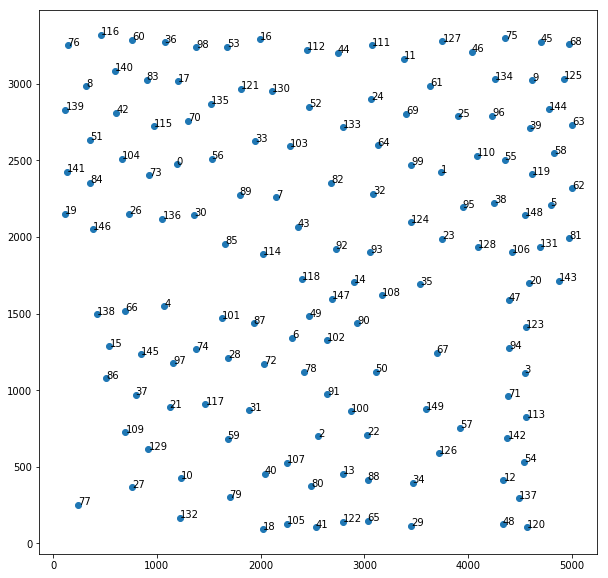

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(cluster_df[0], cluster_df[1])

for i, txt in enumerate(list(cluster_df.index)):
    ax.annotate(txt, (cluster_df[0][i], cluster_df[1][i]))

In [30]:
preds = kmeans.predict(X)

In [31]:
cities['clusters'] = preds

In [32]:
node_path = [84,141,51,139,8,76,116,60,36,98,53,16,112,44,111,11,127,46,75,45,68,125,9,134,96,25,61,69,24,133,52,130,121,135
             ,70,17,83,140,42,104,115,0,56,33,103,82,32,64,99,1,110,55,39,144,63,58,119,62,5,81,143,123,3,113,54,137,120,48,12,142,
             71,94,47,20,131,148,106,38,128,95,23,124,35,108,90,50,67,149,57,126,34,29,65,88,22,100,91,78,102,6,72,31,59,79,18,105,
             41,122,13,80,2,107,40,132,77,27,10,129,109,21,117,28,74,97,37,86,145,15,138,66,4,101,87,49,147,14,93,92,118,43,114,7,
             89,85,30,136,73,26,146,19]

In [33]:
final_node_lst = []

In [36]:
for i in log_progress(node_path):
    cities_subset = cities.loc[cities['clusters'] == i]
    node_lst = main()
    cities_subset.loc[:,'sort_values'] = node_lst
    final_node_lst.append(list(cities_subset.sort_values('sort_values')['CityId']))

In [37]:
len(final_node_lst)

150

In [38]:
final_final_node_lst = []

In [39]:
for node_lst in final_node_lst:
    for node in node_lst:
        final_final_node_lst.append(node)

In [40]:
final_final_node_lst.append(0)

In [41]:
len(final_final_node_lst)

197770

In [42]:
submission_df = pd.DataFrame({'Path':final_final_node_lst})

In [43]:
submission_df.to_csv('submission_dfv3.csv', index=False)

In [46]:
submission_df['is_prime'] = submission_df.Path.apply(is_prime)

In [48]:
primes = submission_df.loc[submission_df.is_prime == True]

In [50]:
non_primes = submission_df.loc[submission_df.is_prime == False]

In [73]:
non_prime_lst = list(non_primes.sort_index(ascending = False)['Path'])
prime_lst = list(primes.sort_index(ascending = False)['Path'])

In [74]:
prime_path = []

In [75]:
for i in log_progress(range(0, len(submission_df))):
    if i % 10 == 0 and len(prime_lst) > 0 and i != 0:
        prime_path.append(prime_lst.pop())
    else:
        prime_path.append(non_prime_lst.pop())

In [80]:
pd.DataFrame({'Path':prime_path}).to_csv('pp_submission.csv', index = False)

In [113]:
cities.clusters

0          84
1          12
2          69
3           9
4          36
5          49
6         115
7          29
8          70
9          38
10        146
11         40
12        133
13         37
14         15
15        108
16         62
17         96
18        103
19         88
20         35
21         47
22         98
23         61
24        126
25          9
26        113
27         75
28         44
29        145
         ... 
197739    127
197740     39
197741     88
197742     30
197743    148
197744      2
197745    133
197746    119
197747    124
197748     59
197749    142
197750     57
197751    149
197752    101
197753     25
197754    100
197755     17
197756    106
197757      4
197758     20
197759    117
197760    112
197761     76
197762     48
197763    101
197764     76
197765     82
197766    125
197767     93
197768     98
Name: clusters, Length: 197769, dtype: int32

In [110]:
cities.iloc[197536]['X']

449.24247762039704

In [115]:
prime_path[0:100]

[0,
 167632,
 123447,
 129523,
 60460,
 125167,
 173879,
 109220,
 95759,
 41410,
 156157,
 92504,
 110920,
 108653,
 106735,
 103972,
 31674,
 77763,
 67781,
 118683,
 33149,
 123842,
 173172,
 72495,
 150298,
 187715,
 155418,
 43957,
 156855,
 116995,
 2539,
 33433,
 141963,
 77869,
 46360,
 192578,
 175947,
 63927,
 94498,
 179524,
 160697,
 178377,
 98862,
 74925,
 128215,
 166904,
 65764,
 164400,
 170372,
 76263,
 120331,
 157971,
 124683,
 182992,
 59636,
 84662,
 31899,
 75166,
 78234,
 93646,
 119963,
 13855,
 169524,
 77169,
 17371,
 175257,
 175517,
 61115,
 94703,
 178995,
 22133,
 42297,
 111530,
 83789,
 165029,
 141930,
 142606,
 104675,
 174871,
 118421,
 149899,
 98339,
 185203,
 27742,
 99154,
 161357,
 110487,
 89330,
 111794,
 194193,
 78017,
 190113,
 180633,
 22121,
 157731,
 58226,
 70066,
 16047,
 49821,
 94280]

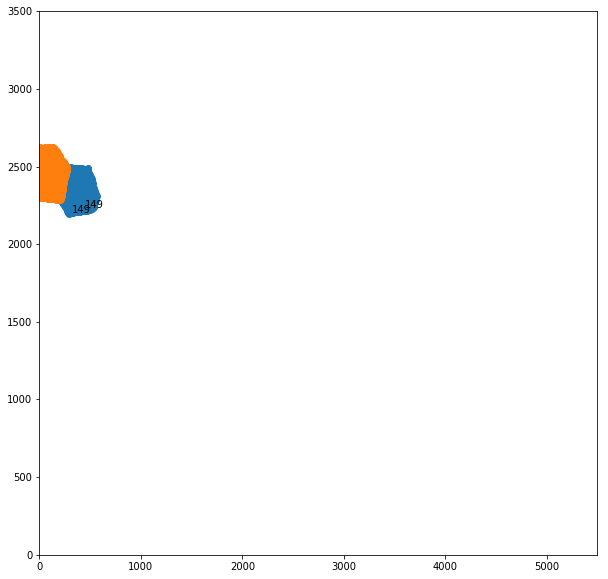

In [117]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(cities.loc[(cities.clusters == 84)]['X'], cities.loc[(cities.clusters == 84)]['Y'])
ax.set_xlim([0,5500])
ax.set_ylim([0,3500])

ax.annotate(txt, (cities.loc[(cities.clusters == 84)]['X'][0], cities.loc[(cities.clusters == 84)]['Y'][0]))
ax.annotate(txt, (cities.iloc[197536]['X'], cities.iloc[197536]['Y']))

ax.scatter(cities.loc[(cities.clusters == 141)]['X'], cities.loc[(cities.clusters == 141)]['Y'])

In [118]:
from sklearn.neighbors import NearestNeighbors

startlist=[0]
neigh = NearestNeighbors(n_neighbors=1, n_jobs=-1)

In [119]:
neigh

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=-1, n_neighbors=1, p=2, radius=1.0)

In [121]:
submission_df.head()

Path  is_prime
0       0     False
1  167632     False
2  123447     False
3  129523     False
4   60460     False

In [122]:
cities.iloc[47239]

CityId        47239
X           314.748
Y           2210.93
is_prime      False
bins             47
zone              0
clusters         84
Name: 47239, dtype: object

In [132]:
import hvplot.pandas
import colorcet as cc

In [139]:
allpoints = cities.hvplot.scatter('X', 'Y',  width=380, height=350, datashade=True, 
                title='All Cities')

ImportError: Datashading is not available

In [133]:
colors = list(reversed(cc.kbc))

In [136]:
primedensity = cities[cities.is_prime].hvplot.hexbin(x='X', y='Y', width=420, height=350, 
                cmap=colors, title='Density of Prime Cities').options(size_index='Count', 
                min_scale=0.8, max_scale=0.95)

In [138]:
allpoints + primedensity

:Layout
   .Scatter.I  :Scatter   [X]   (Y)
   .HexTiles.I :HexTiles   [X,Y]